In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from collections import Counter 
stopwords = set(STOPWORDS)
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Storing dataset into a variable 'df'
df1 = pd.read_excel('/content/drive/My Drive/Dataset/CovidData.xlsx')
df1

,Unnamed: 0,title,text,subcategory,label
0,0.0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0.0
1,1.0,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1.0
2,2.0,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1.0
3,3.0,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0.0
4,4.0,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,false news,0.0
...,...,...,...,...,...
3114,2998.0,2019-nCoV: Health dept. on full alert,Quarantine advised for 80 persons across the S...,true,1.0
3115,2999.0,Screening machine for corona virus launched at...,South Sudan has begun screening all travelers ...,true,1.0
3116,3000.0,Coronavirus (2019-nCoV),Coronavirus (2019-nCoV) is a new respiratory i...,true,1.0
3117,3001.0,Characterizing Patients Hospitalized With COVI...,Characterizing Patients Hospitalized With COVI...,false news,0.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3119 non-null   float64
 1   title        3118 non-null   object 
 2   text         3119 non-null   object 
 3   subcategory  3119 non-null   object 
 4   label        3119 non-null   float64
dtypes: float64(2), object(3)
memory usage: 122.0+ KB


In [ ]:
df1['combined']=df1['title']+" "+df1['text']

In [ ]:
df1=df1.dropna(subset=['combined'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3118 entries, 0 to 3118
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3118 non-null   float64
 1   title        3118 non-null   object 
 2   text         3118 non-null   object 
 3   subcategory  3118 non-null   object 
 4   label        3118 non-null   float64
 5   combined     3118 non-null   object 
dtypes: float64(2), object(4)
memory usage: 170.5+ KB


In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/Dataset/Train.csv')
df3 = pd.read_csv('/content/drive/My Drive/Dataset/Test.csv')

In [ ]:
df2

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
8555,8556,Donald Trump wrongly claimed that New Zealand ...,fake
8556,8557,Current understanding is #COVID19 spreads most...,real
8557,8558,Nothing screams “I am sat around doing fuck al...,fake
8558,8559,Birx says COVID-19 outbreak not under control ...,fake


In [ ]:
frames=[df2,df3]
result=pd.concat(frames)

In [ ]:
result

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
2135,2136,#CoronaVirusUpdates: State-wise details of Tot...,real
2136,2137,Tonight 12(midnight) onwards Disaster Manageme...,fake
2137,2138,296 new cases of #COVID19Nigeria; Plateau-85 E...,real
2138,2139,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,real


In [ ]:
l=result.shape[0]
lis=[]

In [ ]:
for x in range(0,l):
  if result.iloc[x][2] == "real":
    lis.append(1)
  else:
    lis.append(0)

In [ ]:
df1.columns

Index(['Unnamed: 0', 'title', 'text', 'subcategory', 'label', 'combined'], dtype='object')

In [ ]:
df1=df1.drop(axis=1, columns=['Unnamed: 0','subcategory', 'text', 'title'])


In [ ]:
result['combined']=result['tweet']
result=result.drop(axis=1, columns=['id','label', 'tweet'])
result["label"]=lis


In [ ]:
result

,combined,label
0,The CDC currently reports 99031 deaths. In gen...,1
1,States reported 1121 deaths a small rise from ...,1
2,Politically Correct Woman (Almost) Uses Pandem...,0
3,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,Populous states can generate large case counts...,1
...,...,...
2135,#CoronaVirusUpdates: State-wise details of Tot...,1
2136,Tonight 12(midnight) onwards Disaster Manageme...,0
2137,296 new cases of #COVID19Nigeria; Plateau-85 E...,1
2138,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,1


In [ ]:
df1

,label,combined
0,0.0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...
1,1.0,Other Viewpoints: COVID-19 is worse than the f...
2,1.0,Bermuda's COVID-19 cases surpass 100 The Minis...
3,0.0,Purdue University says students face 'close to...
4,0.0,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...
...,...,...
3114,1.0,2019-nCoV: Health dept. on full alert Quaranti...
3115,1.0,Screening machine for corona virus launched at...
3116,1.0,Coronavirus (2019-nCoV) Coronavirus (2019-nCoV...
3117,0.0,Characterizing Patients Hospitalized With COVI...


In [ ]:
df1['label'].value_counts()

1.0    2061
0.0    1057
Name: label, dtype: int64

In [ ]:
frames=[df1, result]
df=pd.concat(frames)

In [ ]:
df

,label,combined
0,0.0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...
1,1.0,Other Viewpoints: COVID-19 is worse than the f...
2,1.0,Bermuda's COVID-19 cases surpass 100 The Minis...
3,0.0,Purdue University says students face 'close to...
4,0.0,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...
...,...,...
2135,1.0,#CoronaVirusUpdates: State-wise details of Tot...
2136,0.0,Tonight 12(midnight) onwards Disaster Manageme...
2137,1.0,296 new cases of #COVID19Nigeria; Plateau-85 E...
2138,1.0,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...


In [ ]:
combined = df['combined']
fake = df[df['label']==0]['combined']
real = df[df['label']==1]['combined']

In [ ]:
def concat_all_sentences(sents):
    all_tokens = ''
    for text in sents:
        tx = str(text).lower().strip()
        tx = tx.replace('\n',' ')
        tx = tx.replace('&amp',' ')
        tx = tx.replace('#','')
        tx = tx.replace('-','')
        tx = tx.replace(';','')
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

In [ ]:
all_tokens = concat_all_sentences(combined)
fake_tokens = concat_all_sentences(fake)   
real_tokens = concat_all_sentences(real)

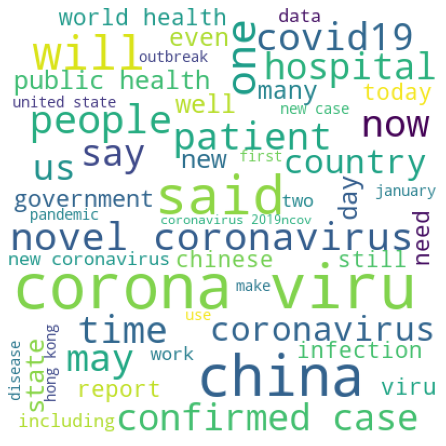

In [ ]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stopwords.union({'https','co'}), 
            min_font_size = 10).generate(all_tokens) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

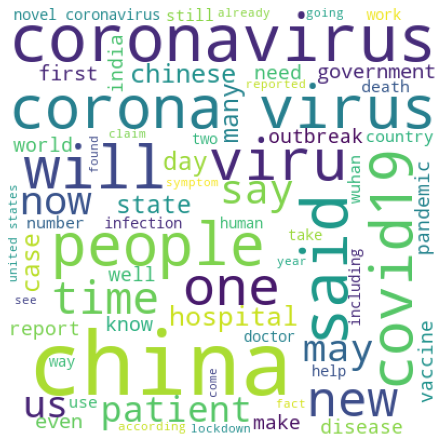

In [ ]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stopwords.union({'https','co'}), 
            min_font_size = 10).generate(fake_tokens) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

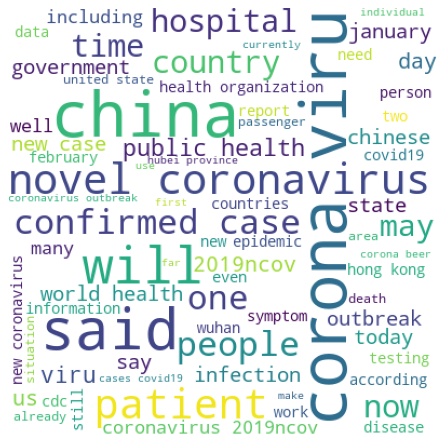

In [ ]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stopwords.union({'https','co'}), 
            min_font_size = 10).generate(real_tokens) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [ ]:
print(len(set(all_tokens.split())))
print(len(set(fake_tokens.split())))
print(len(set(real_tokens.split())))
print(len(set(fake_tokens.split()).intersection(set(real_tokens.split()))))

103528
63699
66452
26623


In [ ]:
all_tokens_words = [w for w in all_tokens.split() if w not in stopwords]
fake_tokens_words = [w for w in fake_tokens.split() if w not in stopwords]
real_tokens_words = [w for w in real_tokens.split() if w not in stopwords]

In [ ]:
Counter(all_tokens_words).most_common(20)

[('virus', 9698),
 ('coronavirus', 8405),
 ('health', 7396),
 ('people', 6261),
 ('corona', 6068),
 ('cases', 6058),
 ('china', 6037),
 ('will', 5960),
 ('new', 5926),
 ('covid19', 5434),
 ('said', 4398),
 ('chinese', 3979),
 ('one', 3272),
 ('confirmed', 3016),
 ('spread', 2925),
 ('outbreak', 2777),
 ('wuhan', 2772),
 ('reported', 2514),
 ('first', 2472),
 ('number', 2423)]

In [ ]:
Counter(fake_tokens_words).most_common(20)

[('coronavirus', 3745),
 ('virus', 3398),
 ('covid19', 2557),
 ('will', 2448),
 ('people', 2426),
 ('corona', 2193),
 ('new', 1907),
 ('health', 1743),
 ('china', 1670),
 ('said', 1463),
 ('one', 1419),
 ('chinese', 1268),
 ('cases', 1177),
 ('may', 985),
 ('medical', 894),
 ('first', 885),
 ('wuhan', 884),
 ('us', 852),
 ('world', 803),
 ('many', 802)]

In [ ]:
Counter(real_tokens_words).most_common(20)

[('virus', 6300),
 ('health', 5653),
 ('cases', 4881),
 ('coronavirus', 4660),
 ('china', 4367),
 ('new', 4019),
 ('corona', 3875),
 ('people', 3835),
 ('will', 3512),
 ('said', 2935),
 ('covid19', 2877),
 ('chinese', 2711),
 ('confirmed', 2508),
 ('spread', 2142),
 ('outbreak', 1992),
 ('reported', 1978),
 ('wuhan', 1888),
 ('one', 1853),
 ('public', 1783),
 ('number', 1778)]

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    text = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                    '(?:%[0-9a-fA-F][0-9a-fA-F]))+', '',text)
    text = re.sub("(@[A-Za-z0-9_]+)","",text)
    text = re.sub("RT",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [ ]:
l=df.shape[0]
l

13818

Lemmatizaion

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import wordnet

In [ ]:
#Function to perform Lemmatization on a Corpus
lemmatizer = WordNetLemmatizer()
def lemmatize(tweets):

    def get_wordnet_pos(word):
        # Map POS tag to first character lemmatize() accepts
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    lemmatized_tweets=[]

    for i in tweets:
        tweet = i
        tweet = tweet.lower()
        tweet = tweet.split()
        tweet = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tweet]
        tweet = ' '.join(tweet) 
        lemmatized_tweets.append(tweet)
    return(lemmatized_tweets)

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
comb = df['combined'].map(lambda x: cleantext(x))
comb=comb.to_list()


In [ ]:
combb=lemmatize(comb)
df['combined']=combb

In [ ]:
combined=df['combined']
label=df['label']

In [ ]:
combined

0       facebook deletes michigan anti lockdown group ...
1       viewpoint covid 19 bad flu officially put rest...
2       bermuda covid 19 case surpass 100 ministry hea...
3       purdue university say student face close zero ...
4       high cost lock america see year worth suicide ...
                              ...                        
2135    coronavirusupdates state wise detail total con...
2136    tonight 12 midnight onwards disaster managemen...
2137    296 new case covid19nigeria plateau 85 enugu 4...
2138    rt cdcemergency dyk cdcgov one stop shop covid...
2139    half pregnant woman recently admit uk hospital...
Name: combined, Length: 13818, dtype: object

In [ ]:
label.value_counts()

1.0    7661
0.0    6157
Name: label, dtype: int64

In [ ]:
s1 = pd.Series(["zombies", "zombie", "aliens", "alien", "parallel universe", "vaccines are safe and protecting", "side effects", ])
s2 = pd.Series([0,0,0,0,0,1,0])
combined=combined.append(s1)
label=label.append(s2)

In [ ]:
combined

0    facebook deletes michigan anti lockdown group ...
1    viewpoint covid 19 bad flu officially put rest...
2    bermuda covid 19 case surpass 100 ministry hea...
3    purdue university say student face close zero ...
4    high cost lock america see year worth suicide ...
                           ...                        
2                                               aliens
3                                                alien
4                                    parallel universe
5                     vaccines are safe and protecting
6                                         side effects
Length: 13825, dtype: object

In [ ]:
label

0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
    ... 
2    0.0
3    0.0
4    0.0
5    1.0
6    0.0
Length: 13825, dtype: float64

In [ ]:
len(combined)

13825

In [ ]:
len(label)

13825

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(combined,label, test_size=0.33, random_state=20)

## **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
pipeline_svm = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('SVM', SVC())
    ])
fit = pipeline_svm.fit(x_train,y_train)

Hyperparameter Tuning

In [ ]:
parameters = {'SVM__C':[10,15,20,25,30], 'SVM__gamma':[0.1,0.01]}


In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipeline_svm, param_grid=parameters, cv=5)

In [ ]:
#grid.fit(x_train, y_train)
#print(grid.best_params_)

'''
Output :

{'SVM__C': 10, 'SVM__gamma': 0.1}

'''

"\nOutput :\n\n{'SVM__C': 10, 'SVM__gamma': 0.1}\n\n"

In [ ]:
pipeline_svm = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('SVM', SVC(C=10, gamma=0.1 ))
    ])
fit = pipeline_svm.fit(x_train,y_train)

SVM
val:
[[1780  263]
 [ 206 2314]]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      2043
         1.0       0.90      0.92      0.91      2520

    accuracy                           0.90      4563
   macro avg       0.90      0.89      0.90      4563
weighted avg       0.90      0.90      0.90      4563

Accuracy :  0.8972167433705895
Precison :  0.8978036850340025
Recall :  0.8972167433705895
F1 :  0.8973690878024992


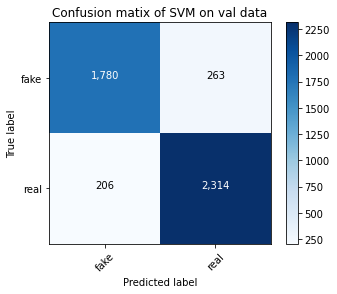

In [ ]:
print('SVM')
print ('val:')
pred=pipeline_svm.predict(x_test)
print_metrices(pred,y_test)

plot_confusion_matrix(confusion_matrix(y_test ,pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on val data')


Testing SVM


In [ ]:
st="Covid vaccines do not work. They are useless"
def info(s):
  ll=[]
  c = cleantext(s)
  ll.append(c)
  c=ll
  ll=lemmatize(c)
  
  ser=pd.Series(ll)
  res=pipeline_svm.predict(ser)
  if res==0:
    return 1
  else:
    return 0


In [ ]:
info(st)

1

## **Implementing model on Tweets**

In [ ]:
import tweepy
import os,sys, csv, time

In [ ]:
%run ./keys.ipynb

ERROR:root:File `'./keys.ipynb.py'` not found.


In [ ]:
consumer_key="USTdo6lh9Xgvui4s8Iuza0Nu9"
consumer_secret="VkRfu07PIqr33TbfmkVhCKMjbvWiKZvUo4wyxskBcqaqCoHk4W"
access_token="1137384737872535552-eTE7cb49eEys1T033xObnhAfgmYhWr"
access_token_secret="UYOuUcVxY8dkyOFzMHRUIJBpw6osar9Bt3ZP03dv9Tvpp"


In [ ]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth)

In [ ]:
def inf(username):
  number_of_tweets=10
  t=[]
  for i in tweepy.Cursor(api.user_timeline, id=username, tweet_mode="extended").items(number_of_tweets):
    t.append(i.full_text)
    t=np.array(t)
    p="@"+username+"'s latest tweet is : "+t[0]
    return info(t[0]),p

In [ ]:
a,b=inf("ibarryxd")
print(a)
print(b)

0
@ibarryxd's latest tweet is : Covid vaccines are working safe. Haven't observed any side effect!


## **Bot Detection**

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Dataset/bot2.csv', encoding='iso-8859-1')

In [ ]:
df


,id,account_type
0,787405734442958848,bot
1,796216118331310080,human
2,875949740503859204,human
3,756119643622735875,human
4,464781334,human
...,...,...
37433,63963107,human
37434,1064042478,human
37435,1089732602,human
37436,815529979,human


In [ ]:
a=df['id'][0]

In [ ]:
user=api.get_user(a)
user

User(_api=<tweepy.api.API object at 0x7faf54e8b850>, _json={'id': 787405734442958848, 'id_str': '787405734442958848', 'name': 'The Best In Dumbest', 'screen_name': 'best_in_dumbest', 'location': '', 'profile_location': None, 'description': 'Blame @MoistHorse, Inspired by @MakingInvisible, using cmu phonetic data to produce incongruous matches. Some images via Lorem Flickr.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1952, 'friends_count': 5, 'listed_count': 56, 'created_at': 'Sat Oct 15 21:32:11 +0000 2016', 'favourites_count': 5, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 15840, 'lang': None, 'status': {'created_at': 'Thu May 05 03:00:07 +0000 2022', 'id': 1522048465928278016, 'id_str': '1522048465928278016', 'text': 'We put the "Not"\ninto "Notable" https://t.co/OKzgIerpAN', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media'

In [ ]:
following = []
followers = []
name = []
ver = []
loc = []
des = []
stcount= []
pback= []
favcount=[]
pcolor=[]
backtile=[]
protected=[]
target=[]

suspended=0
for i in range (0,37400): #did for 37400
  a=df['id'][i]
  try:  ### Exception handling starts here
    user=api.get_user(a)
    following.append(user.friends_count)
    followers.append(user.followers_count)
    name.append(user.screen_name)
    ver.append(user.verified)
    loc.append(user.location)
    des.append(user.description)
    stcount.append(user.statuses_count)
    pback.append(user.profile_use_background_image)
    favcount.append(user.favourites_count)
    pcolor.append(user.profile_text_color)
    backtile.append(user.profile_background_tile)
    protected.append(user.protected)
    target.append(df['account_type'][i])

  except tweepy.error.TweepError:
    suspended=suspended+1

print(suspended," users are suspended")

0  users are suspended


In [ ]:
list_of_tuples = list(zip(following, 
                          followers,
                          name,
                          ver,
                          loc,
                          des,
                          stcount,
                          pback,
                          favcount,
                          pcolor,
                          backtile,
                          protected,
                          target) )

In [ ]:
data = pd.DataFrame(list_of_tuples,
                  columns = ['following', 'followers', 'name', 'ver', 'loc', 'des', 'stcount', 'pback', 'favcount', 'pcolor','backtile','protected', 'target'])

In [ ]:
data=pd.read_csv('/content/drive/My Drive/Dataset/bot.csv', lineterminator='\n')

In [ ]:
data

,following,followers,name,ver,loc,des,stcount,pback,favcount,pcolor,backtile,protected,target
0,5,1952,best_in_dumbest,False,,"Blame @MoistHorse, Inspired by @MakingInvisibl...",15840,False,5,000000,False,False,bot
1,837,799,CJRubinPhoto,False,United States,Photographing the American West since 1980. I ...,251,False,512,000000,False,False,human
2,975,190,SVGEGENT,False,,𝖙𝖍𝖊 𝖘𝖆𝖛𝖆𝖌𝖊 𝖌𝖊𝖓𝖙𝖑𝖊𝖒𝖆𝖓 ...,1321,False,4545,000000,False,False,human


In [ ]:
data['target'].value_counts()

human    2325
bot      1144
Name: target, dtype: int64

In [ ]:
data.protected.value_counts()

False    3308
True      161
Name: protected, dtype: int64

In [ ]:
data['des'].fillna("None", inplace=True)
data['loc'].fillna("None", inplace=True)

In [ ]:
data

,Unnamed: 0,following,followers,name,ver,loc,des,stcount,pback,favcount,pcolor,backtile,protected,target
0,0,5,1944,best_in_dumbest,False,None,"Blame @xaiax, Inspired by @MakingInvisible, us...",15798,False,5,000000,False,False,bot
1,1,837,799,CJRubinPhoto,False,United States,Photographing the American West since 1980. I ...,251,False,512,000000,False,False,human
2,2,972,189,SVGEGENT,False,None,𝖙𝖍𝖊 𝖘𝖆𝖛𝖆𝖌𝖊 𝖌𝖊𝖓𝖙𝖑𝖊𝖒𝖆𝖓 ...,1318,False,4527,000000,False,False,human
3,3,808,716,TinkerVISIONK12,False,"Birmingham, AL",Wife.Godmother.Friend.Feline Fanatic! VISION P...,2275,True,15804,333333,False,False,human
4,4,126,738545,JoleonLescott,True,"England, United Kingdom",England U21 Assistant Coach | @pumafootball Am...,4594,True,449,333333,False,False,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3464,3464,298,297227,Laura_Esquivel,True,Argentina,👇🏻 “Y Ahora Qué” 💘,15255,False,1230,5E412F,False,False,human
3465,3465,833,917,Elly15vs,False,Roma,- Hi! I'm Elisa 🙋🏼🇮🇹 - Graduated in Foreign La...,15262,True,4290,333333,False,False,bot
3466,3466,16,55,bloodyomo,False,None,Professional tweeter,2576,True,2035,666666,True,False,bot
3467,3467,290868,351802,LukeRomyn,True,Australia,USA Today and Amazon #1 best selling author. R...,119324,True,2097,666666,False,False,human


In [ ]:
def vectorize(bots, condition):
    bots['screen_name'] = (bots.name.str.contains("bot", case=False)==True)
    bots['description'] = (bots.des.str.contains("bot", case=False)==True)

    return bots

In [ ]:
condition = (data.name.str.contains("bot", case=False)==True)|(data.des.str.contains("bot", case=False)==True)
df = vectorize(data, condition)

In [ ]:
l=df.shape[0]
location=[]

In [ ]:
for i in range(0,l):
  if df['loc'][i]=="None":
    location.append(False)
  else:
    location.append(True)

In [ ]:
df['location']=location
df=df.drop(['Unnamed: 0','name', 'loc', 'des', 'pcolor'], axis = 1)

In [ ]:
#Splitting data randombly into train_df and test_df
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)
print("Randomly splitting the dataset into training and test, and training classifiers.\n")

Randomly splitting the dataset into training and test, and training classifiers.



In [ ]:
#80%
X_train = train_df[['following', 'followers', 'screen_name', 'ver', 'location', 'description', 'stcount', 'pback', 'favcount', 'backtile','protected']] #train_data
y_train = train_df['target'] #train_target

#20%
X_test = test_df[['following', 'followers', 'screen_name', 'ver', 'location', 'description', 'stcount', 'pback', 'favcount', 'backtile','protected']]#test_Data
y_test = test_df['target'] #test_target

In [ ]:
df['target'].value_counts()

human    2325
bot      1144
Name: target, dtype: int64

In [ ]:
y_test.value_counts()

human    470
bot      224
Name: target, dtype: int64

## Decision Trees Classifier

In [ ]:
#Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import GridSearchCV
d=[1,3,5,6,7,8,9,10]
gp_dt={
    'criterion':["gini", "entropy"],
    'splitter':["best","random"],
    'max_depth':d
    }

dt = DecisionTreeClassifier()


In [ ]:
gs_dt=GridSearchCV(dt,
                gp_dt,
                verbose=1,
                cv=15,
                n_jobs=-1)

In [ ]:
dt_final = gs_dt.fit(X_train, y_train)


Fitting 15 folds for each of 32 candidates, totalling 480 fits


In [ ]:
dt_final.best_params_

{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}

Final Decision Trees Model


In [ ]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 9
                            , splitter= 'best')
#Training on decision tree classifier
model_dt = dt.fit(X_train, y_train)

#Predicting on test data
predicted = model_dt.predict(X_test)

#Checking accuracy
print("Decision Tree Classifier Accuracy: {0}".format(accuracy_score(y_test, predicted)*100))

Decision Tree Classifier Accuracy: 79.82708933717579


In [ ]:
print(classification_report(y_test, model_dt.predict(X_test)))

              precision    recall  f1-score   support

         bot       0.73      0.59      0.65       224
       human       0.82      0.90      0.86       470

    accuracy                           0.80       694
   macro avg       0.78      0.74      0.76       694
weighted avg       0.79      0.80      0.79       694



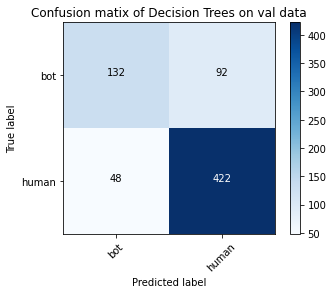

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test ,predicted),target_names=['bot','human'], normalize = False, \
                      title = 'Confusion matix of Decision Trees on val data')

## Gradient Boost Classifier

In [ ]:
pip install xgboost

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb= GradientBoostingClassifier(learning_rate=0.1)
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# A parameter grid for XGBoost
gp_gb= {
    "loss":["deviance"],
    "max_depth":[40,60,80],
    "subsample":[0.5, 0.618, 1.0],
    "n_estimators":[10]
    }

In [ ]:
gs_gb=GridSearchCV(gb,
                gp_gb,
                verbose=1,
                cv=5,
                n_jobs=-1)

In [ ]:
gb_final=gs_gb.fit(X_train, y_train)
gb_final.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'loss': 'deviance', 'max_depth': 80, 'n_estimators': 10, 'subsample': 0.618}

In [ ]:
gb= GradientBoostingClassifier(loss="deviance",
                               max_depth=60,
                               n_estimators=12,
                               subsample=0.618,
learning_rate=0.1)
model_gb = gb.fit(X_train, y_train)

#Predicting on test data
predicted = model_gb.predict(X_test)

#Checking accuracy
print("Gradient Boost Classifier Accuracy: {0}".format(accuracy_score(y_test, predicted)*100))

Gradient Boost Classifier Accuracy: 80.69164265129683


In [ ]:
print(classification_report(y_test, model_gb.predict(X_test)))

              precision    recall  f1-score   support

         bot       0.73      0.63      0.68       224
       human       0.83      0.89      0.86       470

    accuracy                           0.81       694
   macro avg       0.78      0.76      0.77       694
weighted avg       0.80      0.81      0.80       694



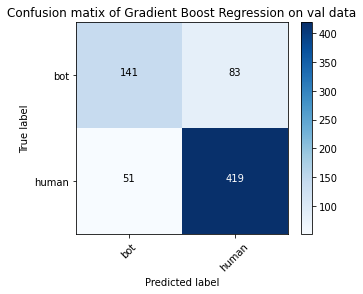

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test ,predicted),target_names=['bot','human'], normalize = False, \
                      title = 'Confusion matix of Gradient Boost Regression on val data')

## **Logistic Regression**

In [ ]:
#Using Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

In [ ]:
c=[]
a=1
for i in range(10,51):
  c.append(i/10)

In [ ]:
lr = LogisticRegression()
gp_lr={'C' : c,
             'solver':['lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
gs_lr=GridSearchCV(lr,
                gp_lr,
                verbose=1,
                cv=5,
                n_jobs=-1)

In [ ]:
lr_final=gs_lr.fit(X_train, y_train)
lr_final.best_params_

Fitting 5 folds for each of 164 candidates, totalling 820 fits


{'C': 1.0, 'solver': 'lbfgs'}

Final Logistic Regression Model

In [ ]:
lr = LogisticRegression(C=1.0, solver='lbfgs')
#Training on Logisic Regression classifier
model_lr = lr.fit(X_train, y_train)

#Predicting on test data
predicted = model_lr.predict(X_test)

#Checking accuracy
print("Logistic Regression Classifier Accuracy: {0}".format(accuracy_score(y_test, predicted)*100))

Logistic Regression Classifier Accuracy: 67.43515850144092


In [ ]:
print(classification_report(y_test, model_lr.predict(X_test)))

              precision    recall  f1-score   support

         bot       0.49      0.21      0.30       224
       human       0.70      0.89      0.79       470

    accuracy                           0.67       694
   macro avg       0.60      0.55      0.54       694
weighted avg       0.64      0.67      0.63       694



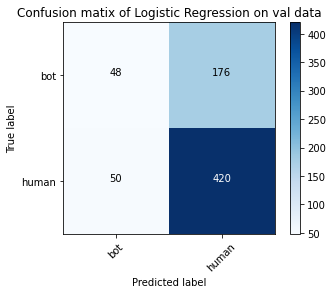

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test ,predicted),target_names=['bot','human'], normalize = False, \
                      title = 'Confusion matix of Logistic Regression on val data')

## **Support Vector Machines**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=SVC()
gp_svm= {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [ ]:
gs_svm=GridSearchCV(svm,
                gp_svm,
                verbose=1,
                cv=5,
                n_jobs=-1)

In [ ]:
svm_final=gs_svm.fit(X_train, y_train)
svm_final.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

Final SVM Model

In [ ]:
svm = SVC(C=100, gamma=0.0001, kernel='rbf')
#Training on Logisic Regression classifier
model_svm = svm.fit(X_train, y_train)

#Predicting on test data
predicted = model_svm.predict(X_test)

#Checking accuracy
print("Logistic Regression Classifier Accuracy: {0}".format(accuracy_score(y_test, predicted)*100))

Logistic Regression Classifier Accuracy: 81.12391930835734


In [ ]:
print(classification_report(y_test, model_svm.predict(X_test)))

              precision    recall  f1-score   support

         bot       0.90      0.47      0.62       224
       human       0.79      0.97      0.87       470

    accuracy                           0.81       694
   macro avg       0.85      0.72      0.75       694
weighted avg       0.83      0.81      0.79       694



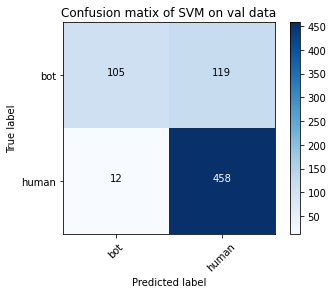

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test ,predicted),target_names=['bot','human'], normalize = False, \
                      title = 'Confusion matix of SVM on val data')

## **Implementing model on Tweets**

In [ ]:
def vectorize_user(bots, condition):
  bots['screen_name'] = (bots.name.str.contains("bot", case=False)==True)
  bots['description'] = (bots.des.str.contains("bot", case=False)==True)
  return bots

In [ ]:
pip install gradio

     |████████████████████████████████| 2.9 MB 12.7 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 212 kB 78.0 MB/s 
     |████████████████████████████████| 253 kB 87.9 MB/s 
     |████████████████████████████████| 1.1 MB 59.7 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 2.0 MB 53.2 MB/s 
     |████████████████████████████████| 144 kB 83.1 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 271 kB 69.1 MB/s 
     |████████████████████████████████| 58 kB 4.0 MB/s 
     |████████████████████████████████| 10.9 MB 48.2 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 4.0 MB 40.6 MB/s 
     |████████████████████████████████| 62 kB 803 kB/s 
     |███████████████████████

In [ ]:
import gradio as gr
def predict(username):
  # fetching the user
  user = api.get_user(username)
  following = user.friends_count
  followers = user.followers_count
  screen_name = user.screen_name
  ver = user.verified
  loc = user.location
  des = user.description
  stcount=user.statuses_count
  pback=user.profile_use_background_image
  favcount = user.favourites_count
  backtile = user.profile_background_tile
  protected = user.protected

  ll=[]
  
  data=[[following,	followers,	ver,	stcount,	pback,	favcount,	backtile,	protected,	screen_name,	des,	loc ]]
  cols=['following',	'followers',	'ver',	'stcount',	'pback',	'favcount',	'backtile',	'protected','name',	'des'	,'loc']
  user = pd.DataFrame(data, columns = cols)
  
  if user['loc'][0]=="None":
    ll.append(False)
  else:
    ll.append(True)

  user['location']=ll
  user=user.drop(['loc'], axis = 1)

  #condition = (user.screen_name.str.contains("bot", case=False)==True)|(user.description.str.contains("bot", case=False)==True)|(user.location.isnull())|(user.verified==False)
  condition = (user.name.str.contains("bot", case=False)==True)|(user.des.str.contains("bot", case=False)==True)
  xd = vectorize_user(user, condition)

  

  test = xd[['following', 'followers', 'screen_name', 'ver', 'location', 'description', 'stcount', 'pback', 'favcount', 'backtile','protected']]
  pred_gb=model_gb.predict(test)
  pred_svm=model_svm.predict(test)

  if pred_svm[0]=="human":
    res=0
  else:
    res = 0 if pred_gb[0]=="human" else 1
    
  return res

/usr/local/lib/python3.7/dist-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
#Final Detector

def detector(username):
  print("hey")
  info, tweet = inf(username)
  bot = predict(username)
  if(info==1 and bot==1):
    o= "❌ Information seems highly fake tweeted from a suspecious account 🤖 "

  if(info==1 and bot==0):
    o = "❌ Tweeted Information can be fake 👨 "

  if(info==0 and bot==1):
    o = " ✅ A bot account detected but information can be real 🤖"
  
  if(info==0 and bot==0):
    o = "✅ Information is detected to be real 👨"
  
  output= "🐦 "+tweet+" \n \n"+o
  return output

In [ ]:
face = gr.Interface(fn=detector,
                    inputs="text", 
                    outputs="text")

face.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://27446.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7faf543fc510>,
 'http://127.0.0.1:7860/',
 'https://27446.gradio.app')